In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import missingno as msno
import os
import sys
import warnings
# from ydata_profiling import ProfileReport


warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("../data/Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('CustomerID')

In [5]:
# find Outliers using boxplot
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    # sns.boxplot(x=df[col])
    # plt.title(f'Boxplot of {col}')
    # plt.xlabel(col)
    # plt.show()
    fig=px.box(df, x=col, title=f'Boxplot of {col}')
    fig.show()

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.shape

(200, 5)

In [8]:
# def treat_outliers_iqr(data, column, lower_quantile=0.01, upper_quantile=0.98, factor=1.5, cap=True):
#     Q1 = data[column].quantile(lower_quantile)
#     Q3 = data[column].quantile(upper_quantile)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - factor * IQR
#     upper_bound = Q3 + factor * IQR

#     if cap:
#         # Cap extreme values
#         data[column] = np.clip(data[column], lower_bound, upper_bound)
#     else:
#         # Remove rows containing outliers
#         data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

#     return data
# # for col in numerical_cols:
# df = treat_outliers_iqr(df, 'Annual Income (k$)',0,0.55,1.5,False)

In [9]:
df.shape

(200, 5)

In [10]:
for col in numerical_cols:
    fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of {col}', nbins=30)
    fig.show()

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
col='Gender'
fig=px.pie(df, names=col, title='Distribution of {col}')
fig.show()

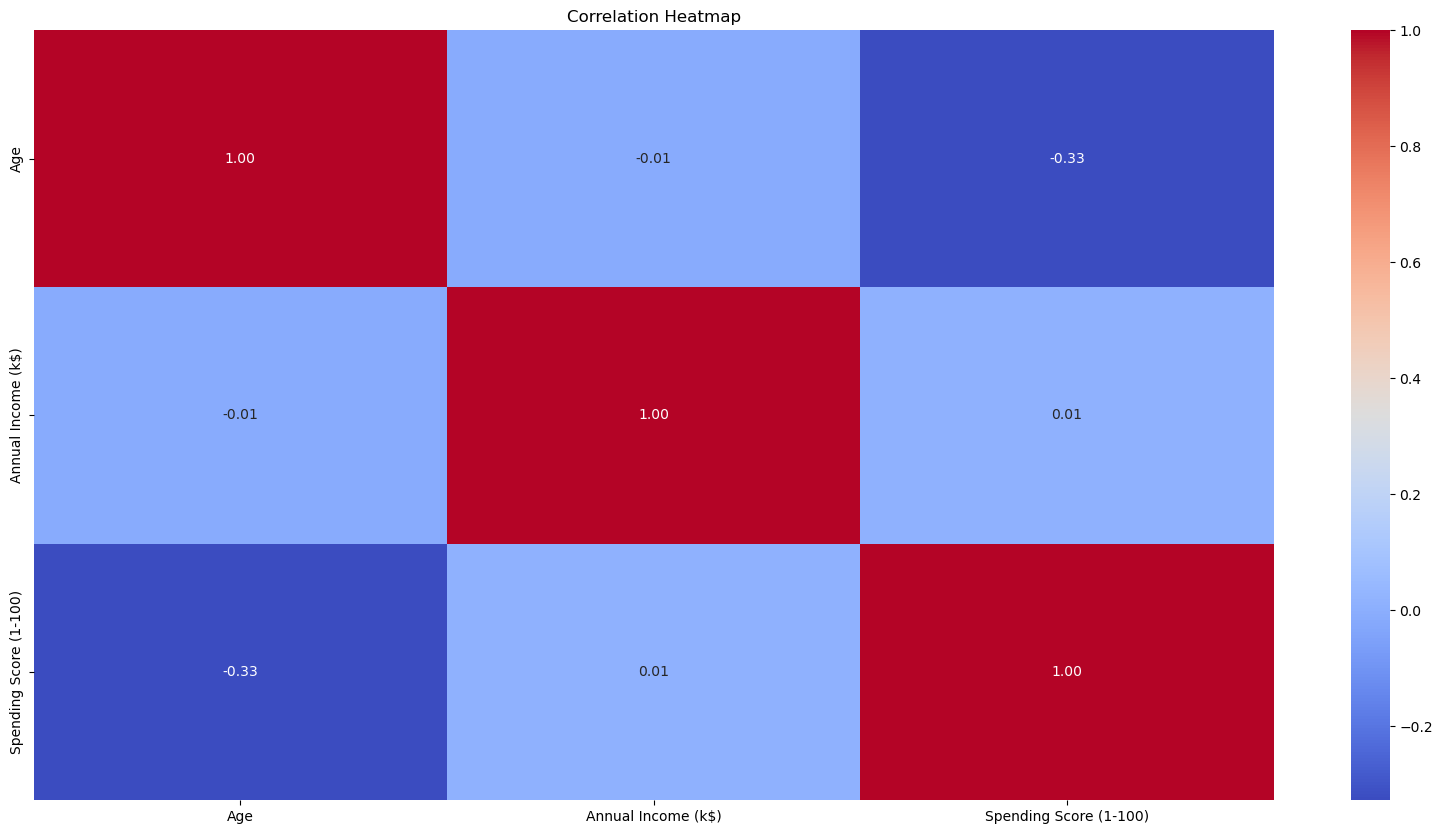

In [13]:
plt.figure(figsize=(20, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

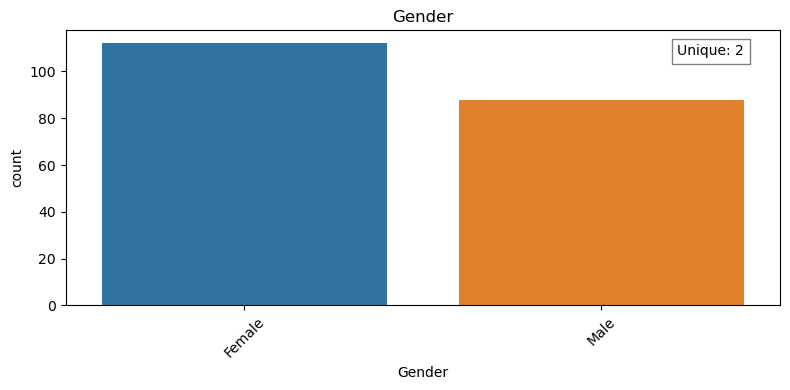

In [15]:
def univariable_categorical(df):
    # cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    # Plot Bar plots for categorical features (top 10 categories)
    # for col in categorical_cols:
        # Get top 10 categories
    col='Gender'
    top_10 = df[col].value_counts().nlargest(10)
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=top_10.index)
    plt.title(f'{col}')
    plt.xticks(rotation=45)
    # Annotate No. of unique values with box
    n_unique = df[col].nunique()
    plt.text(0.95, 0.95, f'Unique: {n_unique}', horizontalalignment='right', verticalalignment='top', 
                transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()

univariable_categorical(df)

In [17]:
df.to_csv('../data/semi_cleaned_Mall_Customers.csv', index=False)